In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('./data/movies_1980_2025.csv')

features = ['Year', 'Votes', 'Duration_minute', 'budget_usd', 'Rating']
df_clean = df[features].dropna()

X = df_clean.drop('Rating', axis=1)
y = df_clean['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"테스트 점수 (R²): {r2:.4f}")
print(f"평균 오차 (RMSE): {rmse:.4f}")

테스트 점수 (R²): 0.2749
평균 오차 (RMSE): 0.9287


✅ 모델 성능 평가 지표
 R² (결정 계수): 0.2749
 RMSE (평균 제곱근 오차): 0.9287
 MAE (평균 절대 오차): 0.6999


C:\Users\User\AppData\Local\Temp\ipykernel_11460\4020916791.py:54: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_11460\4020916791.py:54: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_11460\4020916791.py:54: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_11460\4020916791.py:54: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_11460\4020916791.py:54: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_11460\4020916791.py:54: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(

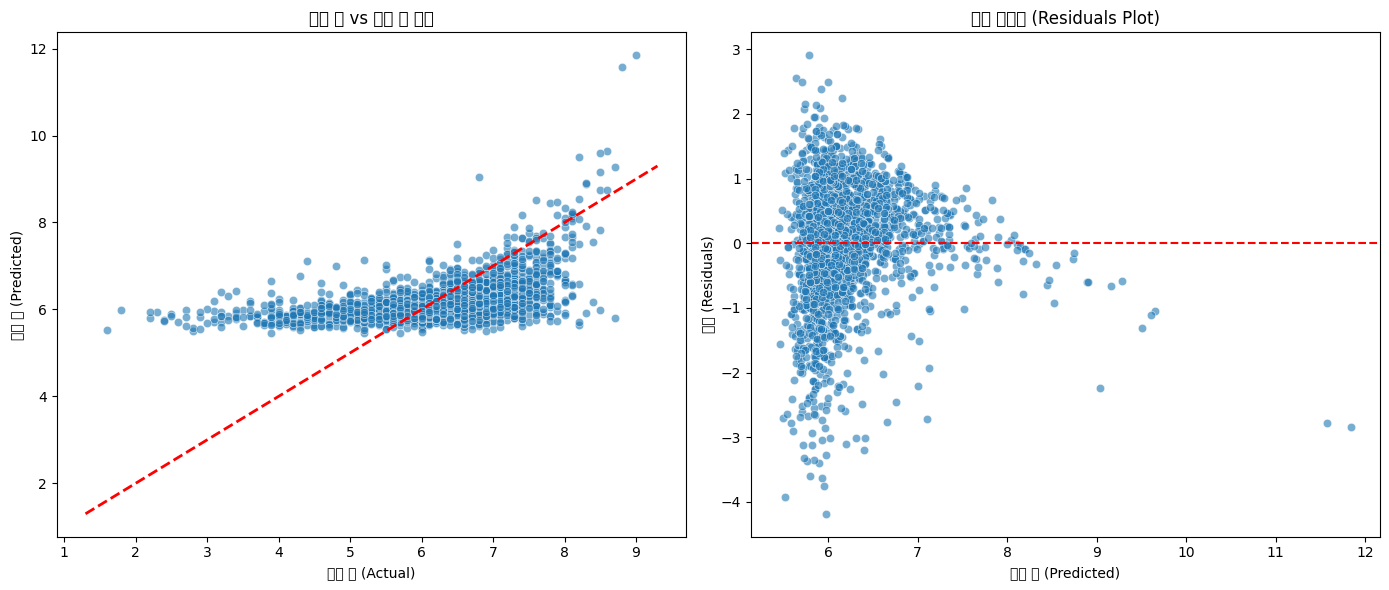

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # 1. 데이터 준비
    df = pd.read_csv('./data/movies_1980_2025.csv')
    features = ['Year', 'Votes', 'Duration_minute', 'budget_usd', 'Rating']
    df_clean = df[features].dropna()
    X = df_clean.drop('Rating', axis=1)
    y = df_clean['Rating']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 2. 모델 학습
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 3. 예측
    y_pred = model.predict(X_test)

    # 4. 성능 평가 (숫자 지표)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    print("✅ 모델 성능 평가 지표")
    print(f" R² (결정 계수): {r2:.4f}")
    print(f" RMSE (평균 제곱근 오차): {rmse:.4f}")
    print(f" MAE (평균 절대 오차): {mae:.4f}")


    # 5. 성능 시각화 (그래프)
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # 그래프 1: 실제 값 vs 예측 값
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, ax=axes[0])
    axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
    axes[0].set_title('실제 값 vs 예측 값 비교')
    axes[0].set_xlabel('실제 값 (Actual)')
    axes[0].set_ylabel('예측 값 (Predicted)')

    # 그래프 2: 잔차 그래프
    residuals = y_test - y_pred
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, ax=axes[1])
    axes[1].axhline(y=0, color='r', linestyle='--')
    axes[1].set_title('잔차 그래프 (Residuals Plot)')
    axes[1].set_xlabel('예측 값 (Predicted)')
    axes[1].set_ylabel('잔차 (Residuals)')

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("오류: movies_1980_2025.csv 파일을 찾을 수 없습니다.")
except Exception as e:
    print(f"오류가 발생했습니다: {e}")